In [12]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.utils import shuffle
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)

# %config InlineBackend.figure_formats = {'pdf',}

import seaborn as sns

sns.set_context('notebook')
sns.set_style('white')

In [13]:
def warm_up_exercise():
    return np.identity(5)

warm_up_exercise()

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  1.]])

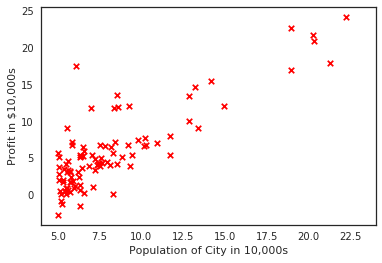

In [14]:
data = np.loadtxt('ex1/ex1data1.txt', delimiter=',')
X = np.c_[np.ones(data.shape[0]),
          data[:, :-1]]
y = np.c_[data[:, -1]]

plt.scatter(X[:, 1], y, s=30, c='r', marker='x', linewidths=1)
plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');

In [15]:
def compute_cost(X, y, theta=[[0], [0]]):
    m = y.size
    h = X.dot(theta)
    J = 1.0 / (2 * m) * np.sum(np.square(h - y))
    return J

compute_cost(X, y)

32.072733877455676

In [16]:
def gradientDescent(X, y, theta=[[0], [0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta -= alpha * (1.0 / m) * (X.T.dot(h - y))
        J_history[iter] = compute_cost(X, y, theta)
    return(theta, J_history)

('theta: ', array([-3.63029144,  1.16636235]))


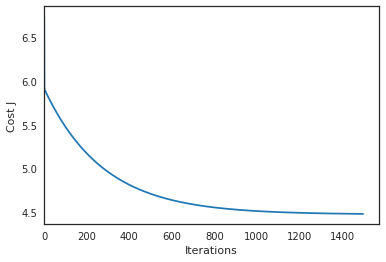

In [17]:
# theta for minimized cost J
theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.xlim(0)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

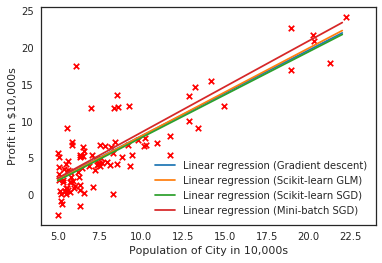

In [18]:
xx = np.arange(5,23)
yy = theta[0] + theta[1] * xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='r', marker='x', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:, 1].reshape(-1, 1), y.ravel())
plt.plot(xx, regr.intercept_ + regr.coef_ * xx, label='Linear regression (Scikit-learn GLM)')

# Compare with Scikit-learn Stochastic Gradient Descent
sgd = SGDRegressor(loss="squared_loss", penalty="l2", max_iter=1500)
sgd.fit(X[:, 1].reshape(-1, 1), y.ravel())
plt.plot(xx, sgd.intercept_ + sgd.coef_ * xx, label='Linear regression (Scikit-learn SGD)')


def batch_generator(*args, **kwargs):
    total_size = len(args[-1])
    chunk_size = kwargs.get('chunk_size', total_size)
    while True:
        new_args = shuffle(*args)
        for i in xrange(0, total_size, chunk_size):
            yield (arg[i: i + chunk_size]
                   for arg in new_args)


# Compare with Scikit-learn Mini-batch SGD
sgd2 = SGDRegressor(loss="squared_loss", penalty="l2", max_iter=None)
batcher = batch_generator(X, y, chunk_size=10)
for _ in xrange(1500 * 10):
    Xr, yr = next(batcher)
    sgd2.partial_fit(Xr[:, 1].reshape(-1, 1), yr.ravel())
plt.plot(xx, sgd2.intercept_ + sgd2.coef_ * xx, label='Linear regression (Mini-batch SGD)')


plt.xlim(4, 24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [19]:
# Predict profit for a city with population of 35K, 70K, 220K
populations = np.array([3.5, 7.0, 22.])

print "\nGradient Descent"
print map(lambda p: int(theta.T.dot([1, p])[0] * 10000), 
          populations)

print "\nREGR"
print map(lambda p: int((regr.intercept_ + regr.coef_[0] * p) * 10000), 
          populations)

print "\nSGD"
print map(lambda p: int((sgd.intercept_[0] + sgd.coef_[0] * p) * 10000), 
          populations)

print "\nSGD Mini-batch"
print map(lambda p: int((sgd2.intercept_[0] + sgd2.coef_[0] * p) * 10000), 
          populations)


Gradient Descent
[4519, 45342, 220296]

REGR
[2798, 44554, 223509]

SGD
[2089, 42973, 218190]

SGD Mini-batch
[4391, 47904, 234389]
